In [224]:
import numpy as np
import random
from scipy.spatial import ConvexHull

x = [random.randint(0, 100) for _ in range(10)]
y = [random.randint(0, 100) for _ in range(10)]
points = np.array([list(element) for element in zip(x, y)])

hull = ConvexHull(points)

print(hull.area)

265.003344840141


In [225]:
import math
import pandas as pd

df = pd.DataFrame(columns=['x', 'y', 'length'])
for i, (x, y) in enumerate(points):
    length = math.sqrt(math.pow(x, 2) + math.pow(y, 2))
    df.loc[i, 'x'] = x
    df.loc[i, 'y'] = y
    df.loc[i, 'length'] = length

df.sort_values('length', inplace=True)

mins = df[:25]
maxs = df[-25:]
meds = df[25: 50]

min_points = np.array([list(element) for element in zip(mins['x'], mins['y'])])
max_points = np.array([list(element) for element in zip(maxs['x'], maxs['y'])])
med_points = np.array([list(element) for element in zip(meds['x'], meds['y'])])

min_hull = ConvexHull(min_points)
max_hull = ConvexHull(max_points)
med_hull = ConvexHull(med_points)

print("작은 넓이:", min_hull.area, "큰 넓이:", max_hull.area)


IndexError: tuple index out of range

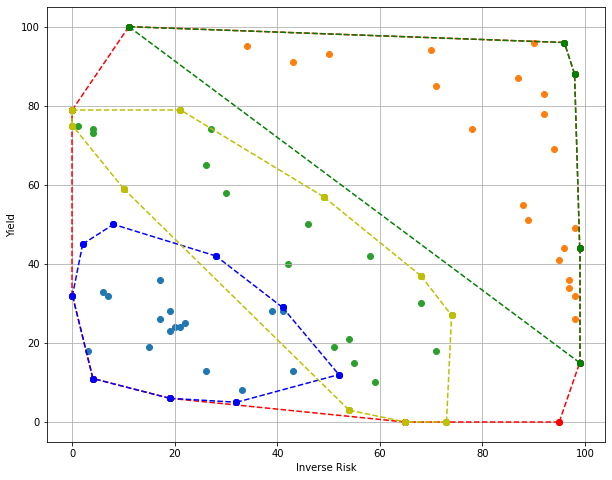

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.xlabel('Inverse Risk')
plt.ylabel('Yield')
plt.scatter(mins['x'], mins['y'])
plt.scatter(maxs['x'], maxs['y'])
plt.scatter(meds['x'], meds['y'])
plt.grid()

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')
    plt.plot(points[simplex, 0], points[simplex, 1], 'ro')

for simplex in min_hull.simplices:
    plt.plot(min_points[simplex, 0], min_points[simplex, 1], 'b--')
    plt.plot(min_points[simplex, 0], min_points[simplex, 1], 'bo')

for simplex in max_hull.simplices:
    plt.plot(max_points[simplex, 0], max_points[simplex, 1], 'g--')
    plt.plot(max_points[simplex, 0], max_points[simplex, 1], 'go')

for simplex in med_hull.simplices:
    plt.plot(med_points[simplex, 0], med_points[simplex, 1], 'y--')
    plt.plot(med_points[simplex, 0], med_points[simplex, 1], 'yo')

plt.show()